# **Project : Stock Market Analysis and Prediction**


### **Stock Market Data From Google Finance**


### **Introduction**


### Stock Market Analysis and Prediction is a comprehensive project focused on technical analysis, data visualization, and forecasting using historical data from Google Finance. This project delves into the performance of major technology stocks, among others, by leveraging the power of Pandas for data manipulation and visualization. Key aspects such as stock trends, volatility, and risk analysis are explored, using past performance as a foundation. The project also implements the Monte Carlo simulation method to predict future stock prices, offering insights into potential market behavior.


# **Questions**


## **In this analysis, I would like to explore the following questions:**

- What was the change in the price of the stock over time?
- What was the daily return of the stock on average?
- What was the moving average of the various stocks?
- What was the correlation between different stocks' closing prices?
- What was the correlation between different stocks' daily returns?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behavior?


In [1]:
#For Data Processing 

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Data Visulaization 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')
%matplotlib inline



In [2]:
#For reading stock data 
from pandas_datareader import data as pdr


#For time stamps 
from datetime import datetime

#For division
from __future__ import division


### **Section 1 - Basic Analysis of Stock Information**


In [3]:
# List of Tech stocks for analytics
tech_lst = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_lst:
    globals()[stock] = yf.download(stock, start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
AAPL.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  175.070007  176.130005  173.740005  175.839996  174.944778   
2023-08-22  177.059998  177.679993  176.250000  177.229996  176.327698   
2023-08-23  178.520004  181.550003  178.330002  181.119995  180.197906   
2023-08-24  180.669998  181.100006  176.009995  176.380005  175.482040   
2023-08-25  177.380005  179.149994  175.820007  178.610001  177.700699   

              Volume  
Date                  
2023-08-21  46311900  
2023-08-22  42084200  
2023-08-23  52722800  
2023-08-24  54945800  
2023-08-25  51449600

In [5]:
#Summery stats for Apple Stock
AAPL.describe()


Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   188.849722  190.629048  187.272301  189.050000  188.498341   
std     17.198352   17.486125   16.841997   17.213572   17.360266   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.347500  177.245003  173.812504  175.677505  174.799145   
50%    185.605003  186.974998  183.720001  185.614998  184.913315   
75%    194.642498  195.810001  193.252499  194.382504  193.840256   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.520000e+02  
mean   6.022051e+07  
std    2.487187e+07  
min    2.404830e+07  
25%    4.646538e+07  
50%    5.368500e+07  
75%    6.595975e+07  
max    2.464214e+08

In [6]:
#genral info
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-21 to 2024-08-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


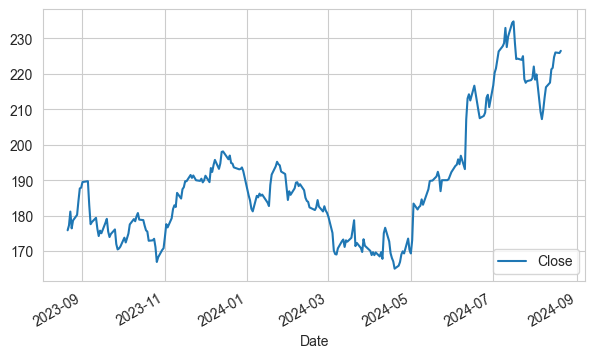

In [7]:
# let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(7, 4))
plt.legend(loc='lower right')


<Axes: xlabel='Date'>

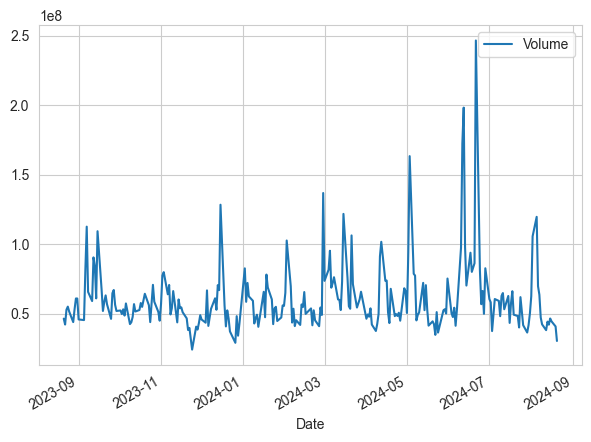

In [8]:
# Now let's plot the total volume of stock being traded each day over the past year 

AAPL['Volume'].plot(legend = True, figsize = (7,5))


<Axes: xlabel='Date'>

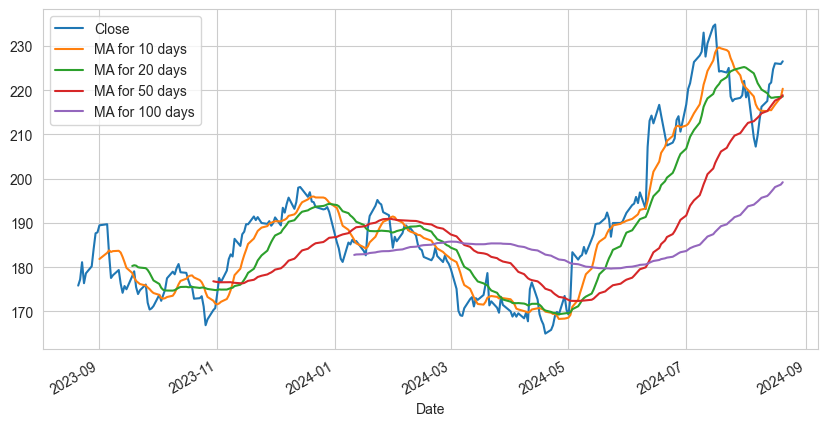

In [9]:
#pandas has a built in rolling mean calculator 
#lets go ahead and plot out several moving averages

MA_day = [10, 20, 50, 100]

for ma in MA_day:
    column_name = f'MA for {ma} days'
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots = False,figsize = (10,5))


## **Section 2- Daily Return Analysis**


<Axes: xlabel='Date'>

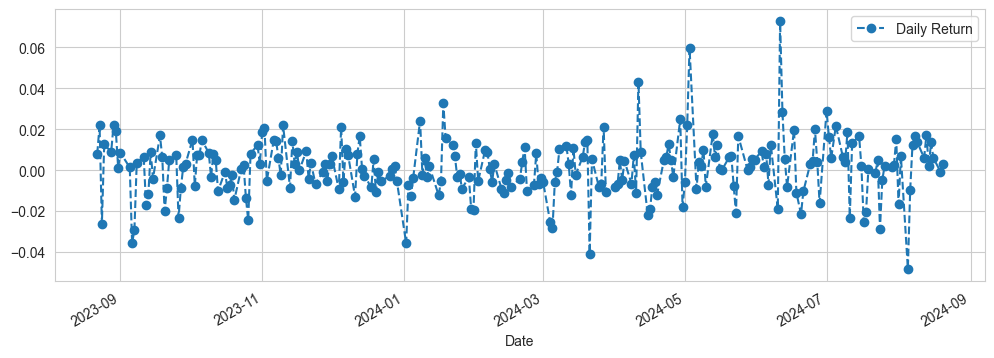

In [10]:
# We'll use pct_change to find the percent change for the each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

#lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize = (12,4),legend = True, linestyle = '--',marker = 'o')


<Axes: >

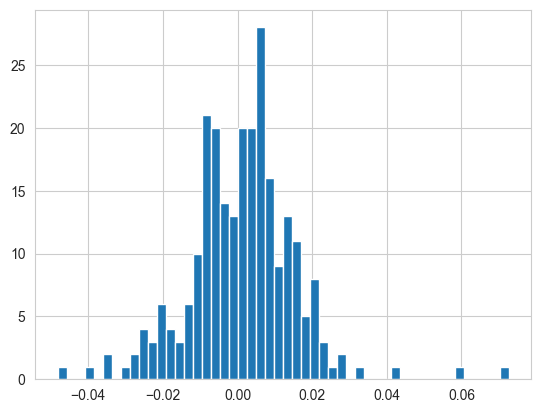

In [11]:
AAPL['Daily Return'].hist(bins = 50)


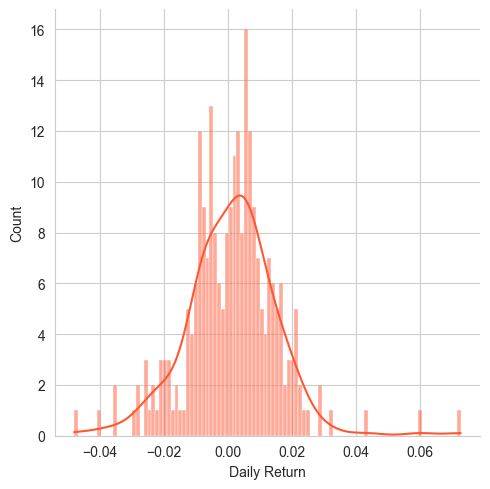

In [12]:
# Assuming 'Daily Return' has been calculated and cleaned
daily_return_clean = AAPL['Daily Return'].dropna()

# Plot using seaborn's displot with KDE curve
color_code = '#FF5733'  # Custom hex color code
sns.displot(daily_return_clean, bins=100, kde=True, color=color_code)



In [13]:
# Grab all the closing prices for the tech stock list one dataframe

# Fetch the data using yfinance
closingprice_df = yf.download(tech_lst, start=start, end=end)['Close']


[*********************100%%**********************]  4 of 4 completed


In [14]:
closingprice_df.head(10)


Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2023-08-21  175.839996  134.679993  128.369995  321.880005
2023-08-22  177.229996  134.250000  129.080002  322.459991
2023-08-23  181.119995  135.520004  132.369995  327.000000
2023-08-24  176.380005  131.839996  129.779999  319.970001
2023-08-25  178.610001  133.259995  129.880005  322.980011
2023-08-28  180.190002  133.139999  131.009995  323.700012
2023-08-29  184.119995  134.910004  134.570007  328.410004
2023-08-30  187.649994  135.070007  135.880005  328.790009
2023-08-31  187.869995  138.009995  136.169998  327.760010
2023-09-01  189.460007  138.119995  135.660004  328.660004

In [15]:
# make a new tech returns DataFrames
tech_returns = closingprice_df.pct_change()

tech_returns.head()


Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-08-21       NaN       NaN       NaN       NaN
2023-08-22  0.007905 -0.003193  0.005531  0.001802
2023-08-23  0.021949  0.009460  0.025488  0.014079
2023-08-24 -0.026170 -0.027155 -0.019566 -0.021498
2023-08-25  0.012643  0.010771  0.000771  0.009407

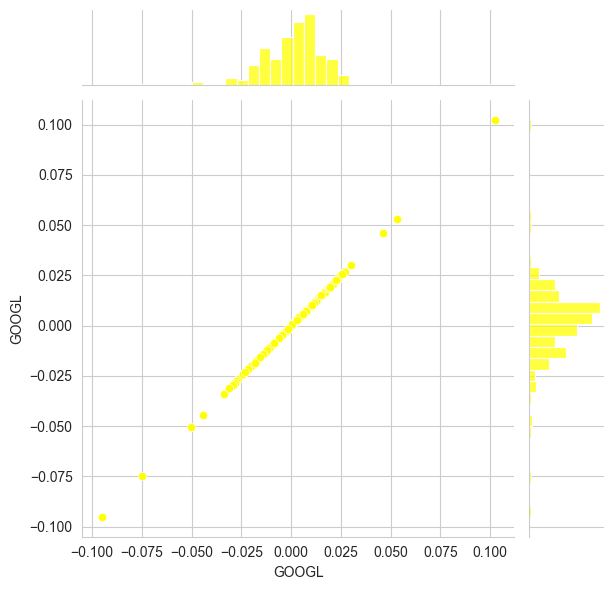

In [16]:
# Assuming tech_returns is a DataFrame with Google’s returns data
# Ensure 'GOOGL' is a column in tech_returns

# Plot using seaborn's jointplot
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='yellow')


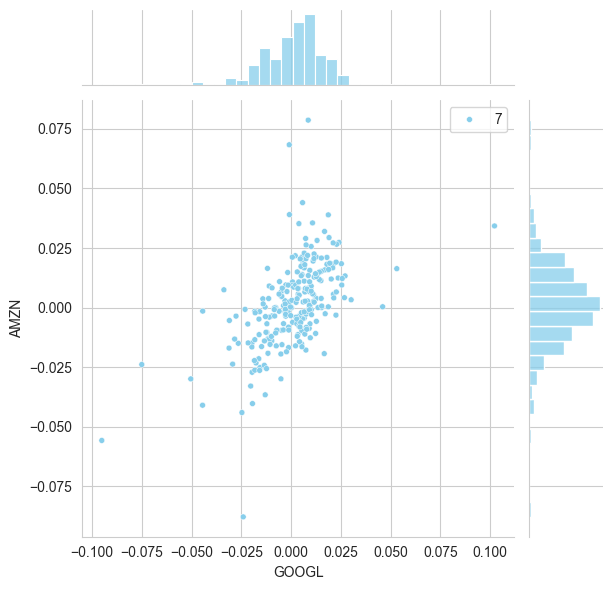

In [17]:
# we'll use joinplot to compare the daily returns of Google and Amazon

sns.jointplot(x= 'GOOGL',y='AMZN',data = tech_returns, kind = 'scatter',size = 7, color = 'skyblue')


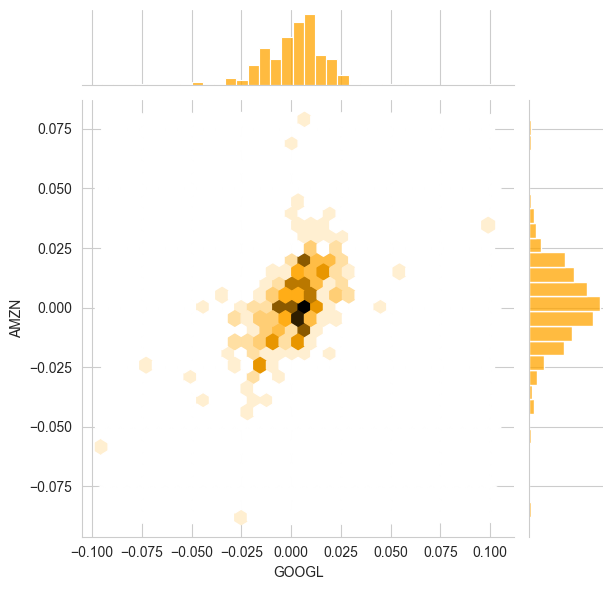

In [18]:
# with Hex plot 
sns.jointplot(x='GOOGL',y='AMZN',data = tech_returns,kind = 'hex',color ='orange')


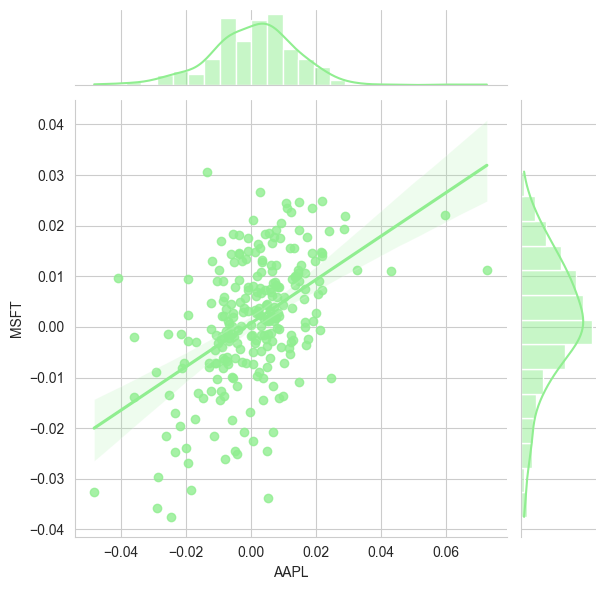

In [19]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot(x='AAPL',y='MSFT',data = tech_returns, kind='reg', color='lightgreen')


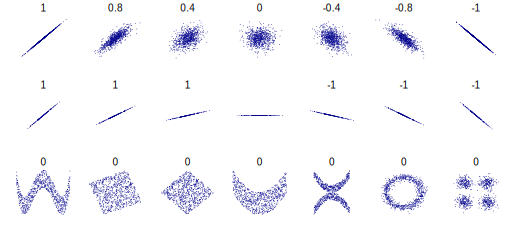

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


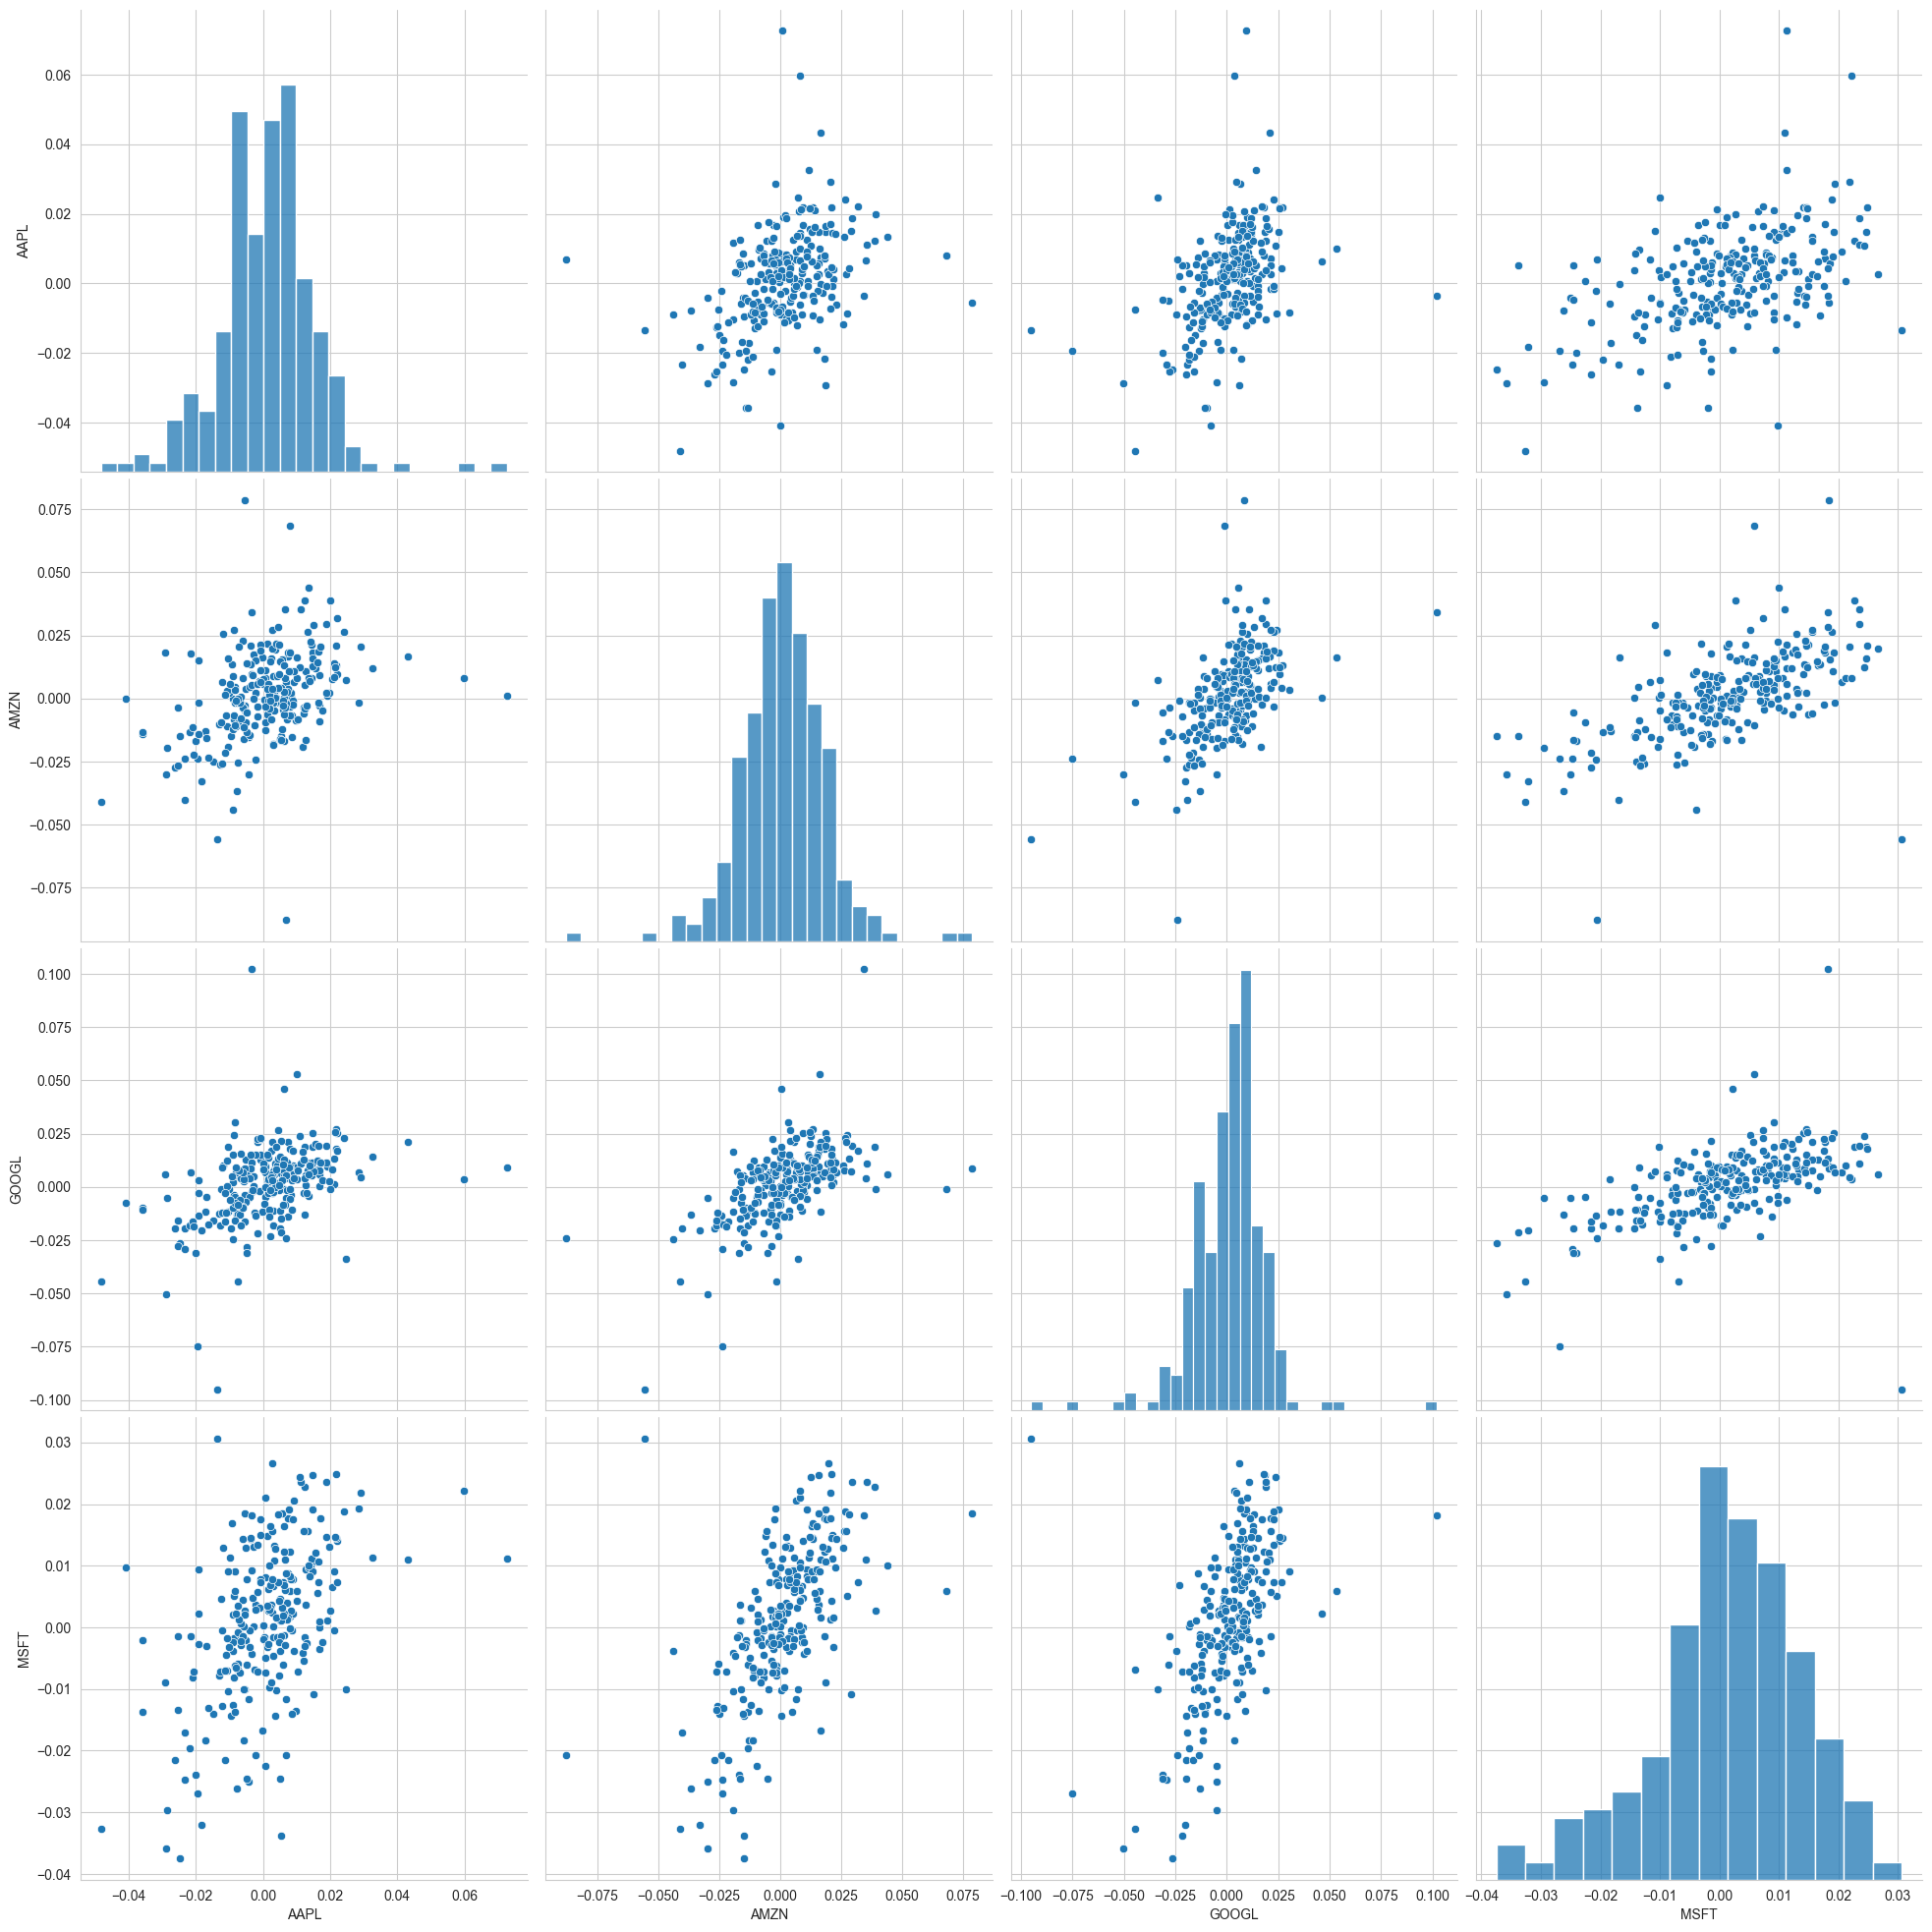

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_returns.dropna(),height= 5)


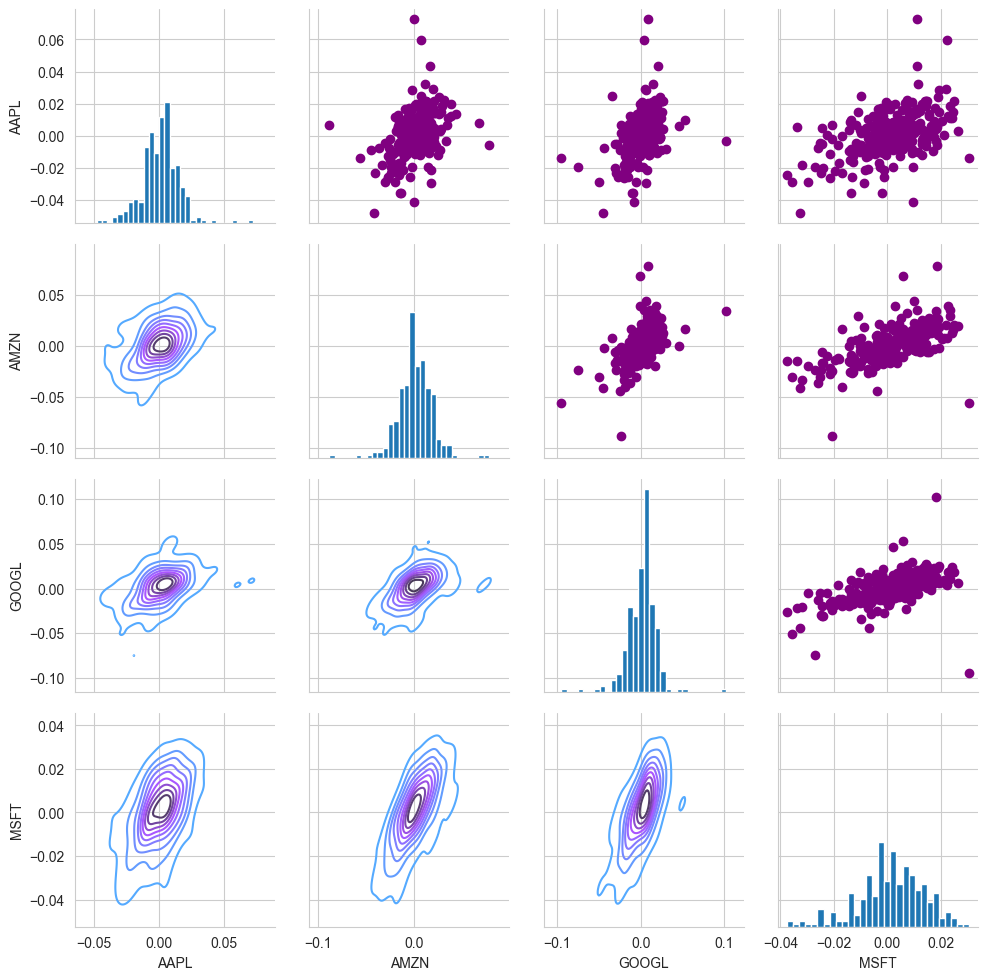

In [22]:
#set up the figure by naming it returns_fig, call p airGrid on the DataFrame

return_fig = sns.PairGrid(tech_returns.dropna())

#using map_upper we can specify what the upper triangle will look like.

return_fig.map_upper(plt.scatter, color='purple')

#we can also define the lower triangle in the figure, including the plot type (kde) & the color map(BluePurple)

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins = 30)


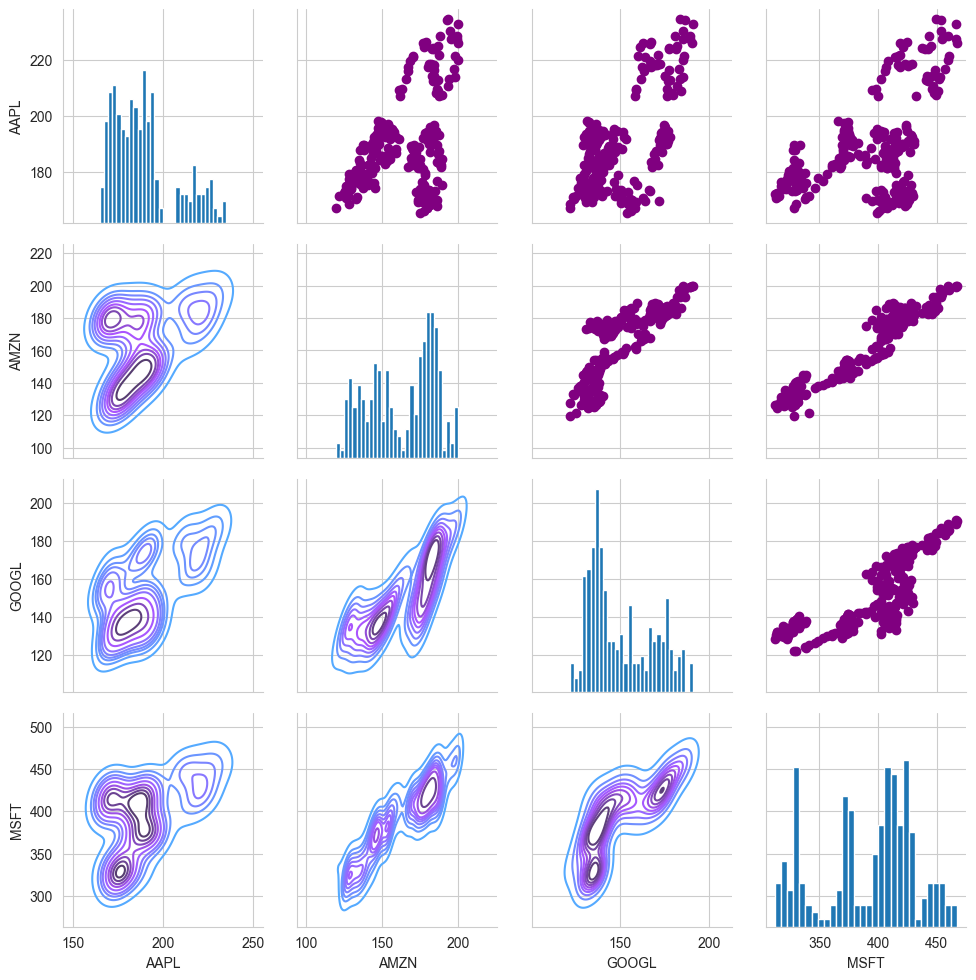

In [23]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


<Axes: xlabel='Ticker', ylabel='Ticker'>

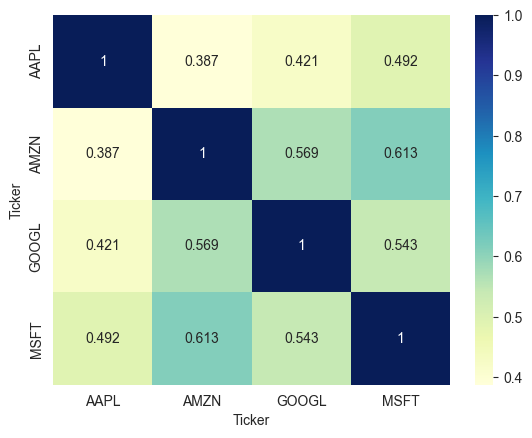

In [24]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')


<Axes: xlabel='Ticker', ylabel='Ticker'>

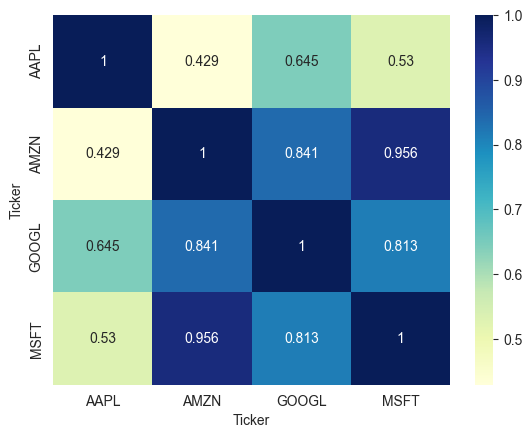

In [25]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')


## **Risk Analysis**


In [26]:
#lets start by defining a new DataFrame as a cleaned version of the original tech_returns DataFrame

rets = tech_returns.dropna()

rets.head()


Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-08-22  0.007905 -0.003193  0.005531  0.001802
2023-08-23  0.021949  0.009460  0.025488  0.014079
2023-08-24 -0.026170 -0.027155 -0.019566 -0.021498
2023-08-25  0.012643  0.010771  0.000771  0.009407
2023-08-28  0.008846 -0.000900  0.008700  0.002229

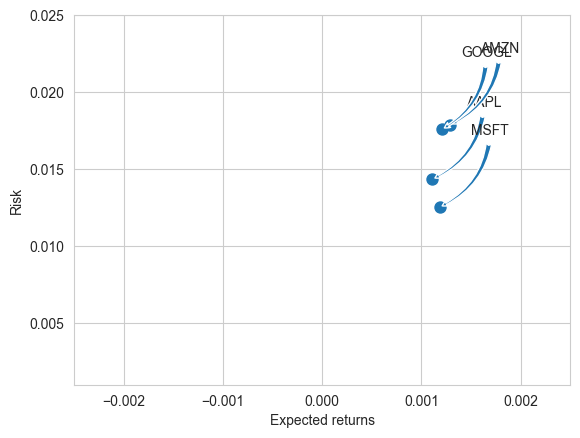

In [27]:
# Define the area for the circles to avoid tiny points
area = np.pi * 20

# Scatter plot
plt.scatter(rets.mean(), rets.std(), s=area)

# Set the x and y limits of the plot (adjust or remove if needed)
plt.xlim([-0.0025, 0.0025])
plt.ylim([0.001, 0.025])

# Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plot points
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy=(x, y), 
        xytext=(50, 50),
        textcoords='offset points', 
        ha='right', 
        va='bottom',
        arrowprops=dict(
            arrowstyle='fancy', 
            connectionstyle='arc3,rad=-0.3'
        )
    )


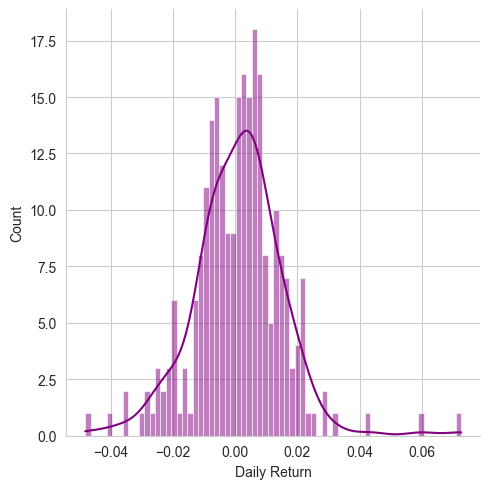

In [28]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

sns.displot(AAPL['Daily Return'].dropna(),bins = 70,kde = True, color = 'purple')


In [29]:
# The 0.05 empirical quantile of daily returns for AAPL stocks
rets["AAPL"].quantile(0.05)


-0.022542162909399588

#### The 0.05 empirical quantile of daily returns is -0.0226. This means that with 95% confidence, the worst daily loss will not exceed 2.26%. If we have a $1 million investment, our one-day 5% Value at Risk (VaR) is

#### **calculated as: 0.0226×1,000,000**

#### **=$22,610.030.0226×1,000,000**

#### **=$22,610.03**

#### So, our one-day 5% VaR is $22,610.03.


In [30]:
# For AMZN stocks
rets['AMZN'].quantile(0.05)


-0.02550798379378677

In [31]:
# FOR GOOGL stocks
rets['GOOGL'].quantile(0.05)


-0.02434250893142753

In [32]:
# For MSFT stocks
rets['MSFT'].quantile(0.05)


-0.023260719354674553

In [33]:
rets.head()


Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-08-22  0.007905 -0.003193  0.005531  0.001802
2023-08-23  0.021949  0.009460  0.025488  0.014079
2023-08-24 -0.026170 -0.027155 -0.019566 -0.021498
2023-08-25  0.012643  0.010771  0.000771  0.009407
2023-08-28  0.008846 -0.000900  0.008700  0.002229

In [34]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']


In [35]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [36]:
GOOGL.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  127.180000  128.729996  126.559998  128.369995  128.222839   
2023-08-22  128.509995  130.279999  128.320007  129.080002  128.932022   
2023-08-23  130.179993  133.410004  129.869995  132.369995  132.218246   
2023-08-24  133.949997  134.250000  129.570007  129.779999  129.631226   
2023-08-25  129.539993  130.759995  127.250000  129.880005  129.731110   

              Volume  
Date                  
2023-08-21  25248700  
2023-08-22  22067500  
2023-08-23  27819700  
2023-08-24  28500700  
2023-08-25  26762900

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

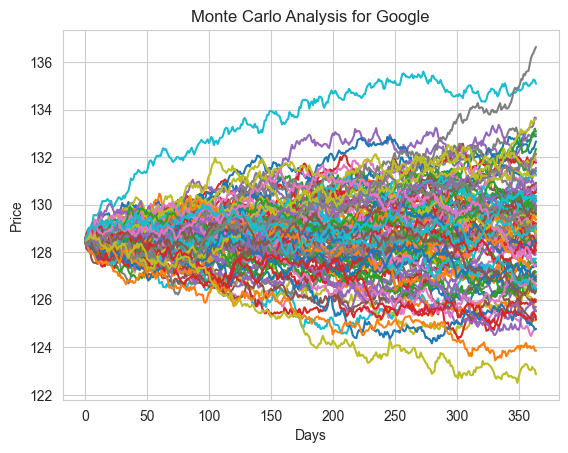

In [37]:
start_price = 128.50

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')


In [38]:
# For Amazon Stock - AMZN

AMZN.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  133.740005  135.190002  132.710007  134.679993  134.679993   
2023-08-22  135.080002  135.649994  133.729996  134.250000  134.250000   
2023-08-23  134.500000  135.949997  133.220001  135.520004  135.520004   
2023-08-24  136.399994  136.779999  131.830002  131.839996  131.839996   
2023-08-25  132.470001  133.869995  130.580002  133.259995  133.259995   

              Volume  
Date                  
2023-08-21  41442500  
2023-08-22  32935100  
2023-08-23  42801000  
2023-08-24  43646300  
2023-08-25  44147500

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

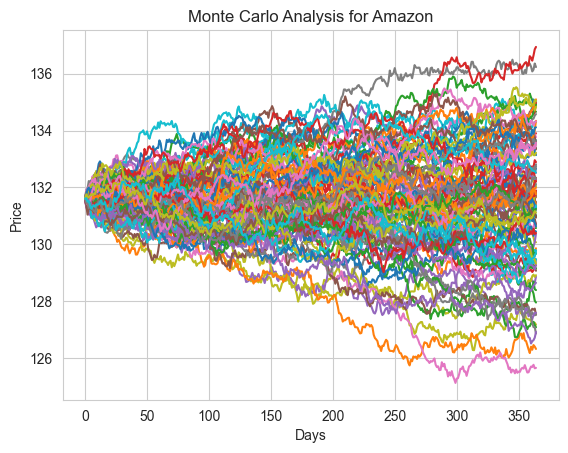

In [39]:
start_price = 131.61

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Amazon')


In [40]:
# FOR apple stock - AAPL

AAPL.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  175.070007  176.130005  173.740005  175.839996  174.944778   
2023-08-22  177.059998  177.679993  176.250000  177.229996  176.327698   
2023-08-23  178.520004  181.550003  178.330002  181.119995  180.197906   
2023-08-24  180.669998  181.100006  176.009995  176.380005  175.482040   
2023-08-25  177.380005  179.149994  175.820007  178.610001  177.700699   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2023-08-21  46311900             NaN             NaN             NaN   
2023-08-22  42084200             NaN             NaN             NaN   
2023-08-23  52722800             NaN             NaN             NaN   
2023-08-24  54945800             NaN             NaN             NaN   
2023-08-25  51449600             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2023-08-21              NaN           NaN  
2023-08-22              NaN      0.007905  
2023-08-23              NaN      0.021949  
2023-08-24              NaN     -0.026170  
2023-08-25              NaN      0.012643

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

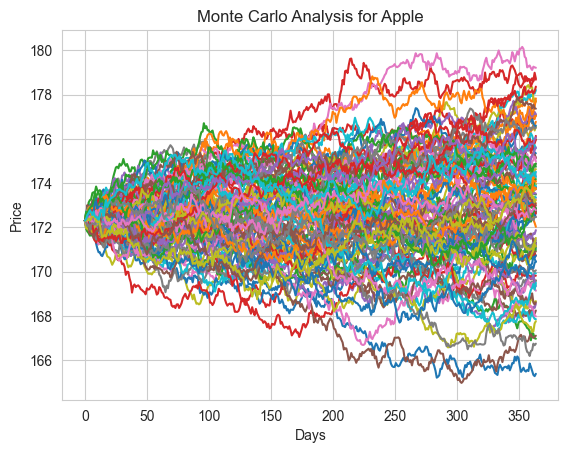

In [41]:
start_price = 172.300

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Apple')


In [42]:
# For Microsoft Stock - MSFT

MSFT.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  317.929993  322.769989  317.040009  321.880005  319.481964   
2023-08-22  325.500000  326.079987  321.459991  322.459991  320.057617   
2023-08-23  323.820007  329.200012  323.459991  327.000000  324.563812   
2023-08-24  332.850006  332.980011  319.959991  319.970001  317.586182   
2023-08-25  321.470001  325.359985  318.799988  322.980011  320.573761   

              Volume  
Date                  
2023-08-21  24040000  
2023-08-22  16102000  
2023-08-23  21166400  
2023-08-24  23281400  
2023-08-25  21684100

Text(0.5, 1.0, 'Monte Carlo Analysis For Microsoft')

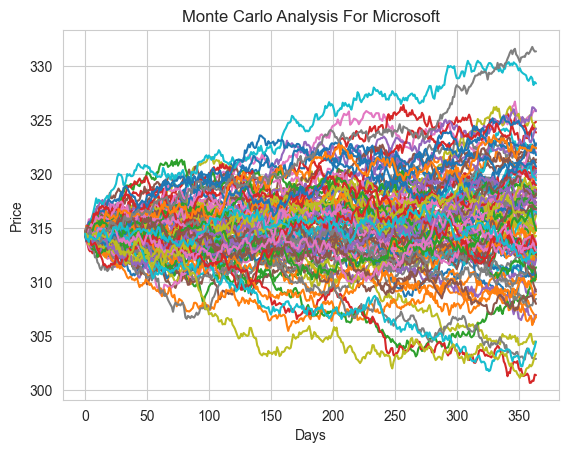

In [43]:
start_price = 314.48

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis For Microsoft')


In [44]:
# lets start with google stock price
start_price = 128.50

#set a large number of runs
runs = 10000

#create an empty matrix to hold the end price data 
simulations = np.zeros(runs)

for run in range(runs):
    #set the simulations data point as the last stock price for that run

    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


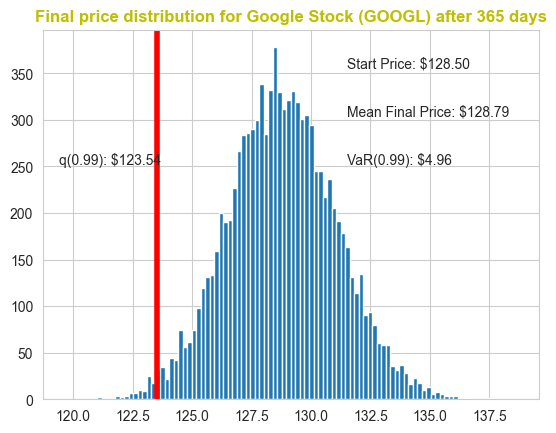

In [45]:
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Plot title
plt.title("Final price distribution for Google Stock (GOOGL) after %s days" % days, weight='bold', color='y')

# Display the plot
plt.show()


#### The histogram shows that after 365 days, the final price of Google Stock is likely to be around the mean of $128.81. The red line at $123.77 represents a 1% chance of the price dropping to or below this level. The VaR of $4.73 indicates the potential loss with a 99% confidence level in this worst-case scenario.


In [46]:
# for Amazon stock price
start_price = 131.61

#set a large number of runs
runs = 10000

#create an empty matrix to hold the end price data 
simulations = np.zeros(runs)

for run in range(runs):
    #set the simulations data point as the last stock price for that run

    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Amazon Stock (AMZN) after 365 days')

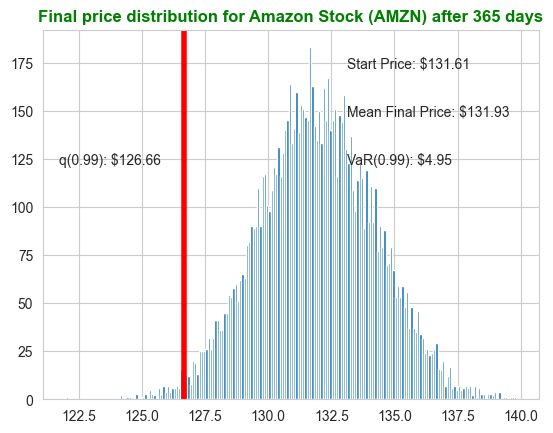

In [ ]:
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to add additional information onto the plot
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Amazon Stock (AMZN) after %s days" % days, weight='bold', color='green')


In [ ]:
# for Apple stock price
start_price = 172.300

#set a large number of runs
runs = 10000

#create an empty matrix to hold the end price data 
simulations = np.zeros(runs)

for run in range(runs):
    #set the simulations data point as the last stock price for that run

    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Apple Stock (AAPL) after 365 days')

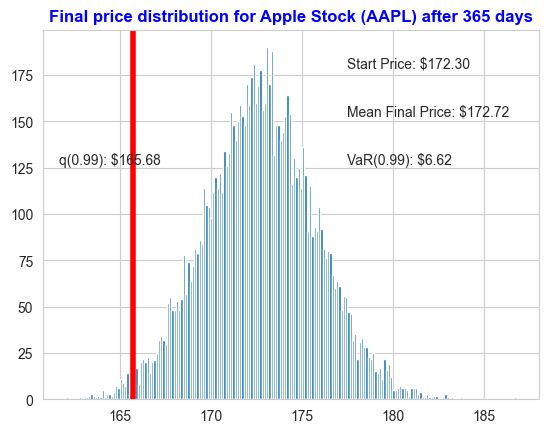

In [ ]:
# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to add additional information onto the plot
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Apple Stock (AAPL) after %s days" % days, weight='bold', color='blue')


In [ ]:
# For Microsoft Stock Price
start_price = 314.48

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


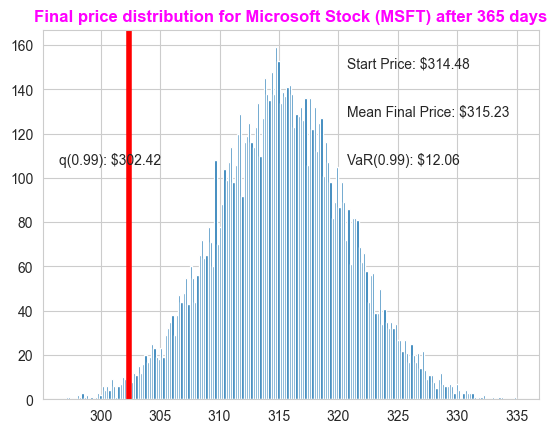

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define q as the 1% empirical quantile
q = np.percentile(simulations, 1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to add additional information onto the plot
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Microsoft Stock (MSFT) after %s days" % days, weight='bold', color='magenta')

# Show plot
plt.show()


In [ ]:
# List of NYSE stocks for analytics
NYSE_list = ['JNJ', 'NKE', 'WMT']

# Set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# For-loop for grabbing stock data and setting as a DataFrame
for stock in NYSE_list:
    df = yf.download(stock, start=start, end=end)
    globals()[stock] = df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
JNJ.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-18  173.169998  173.990005  171.309998  172.490005  167.254044   
2023-08-21  169.690002  169.850006  165.960007  167.350006  162.270081   
2023-08-22  166.860001  167.839996  165.410004  166.020004  160.980453   
2023-08-23  165.899994  166.500000  163.470001  164.529999  159.535675   
2023-08-24  164.029999  166.669998  163.860001  165.089996  160.078674   

               Volume  
Date                   
2023-08-18   49617200  
2023-08-21  151319500  
2023-08-22   56835400  
2023-08-23  119011400  
2023-08-24   70755100

In [ ]:
JNJ.describe()


Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   154.945219  155.952829  153.808407  154.912789  153.045064   
std      5.806035    5.836399    5.757967    5.787303    5.331685   
min    143.820007  145.410004  143.130005  144.380005  142.205338   
25%    149.945000  150.540001  148.784996  149.820000  147.980202   
50%    155.699997  156.580002  154.899994  155.770004  153.476273   
75%    159.625000  160.619995  158.315002  159.510002  157.767899   
max    173.169998  173.990005  171.309998  172.490005  167.254044   

             Volume  
count  2.510000e+02  
mean   8.999908e+06  
std    1.301783e+07  
min    3.246200e+06  
25%    5.746050e+06  
50%    6.840400e+06  
75%    8.476350e+06  
max    1.513195e+08

In [ ]:
JNJ.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

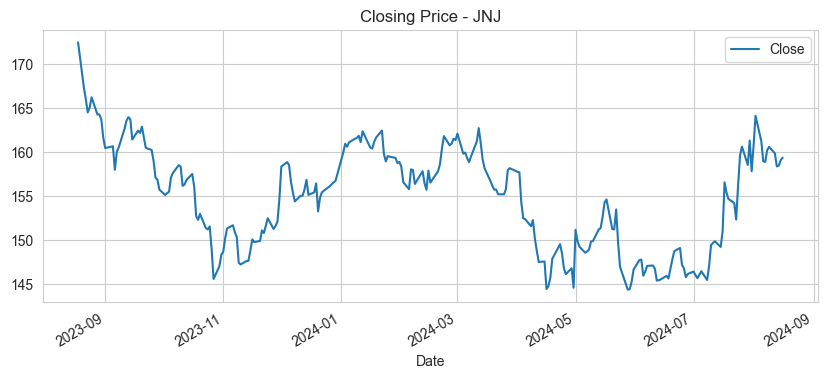

In [ ]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))


<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

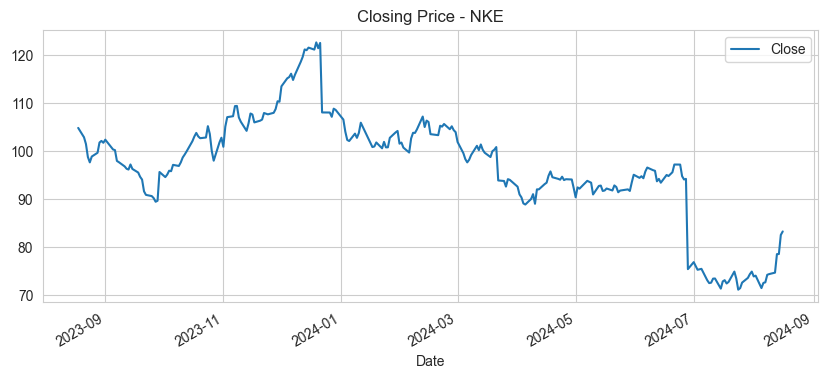

In [ ]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))


<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

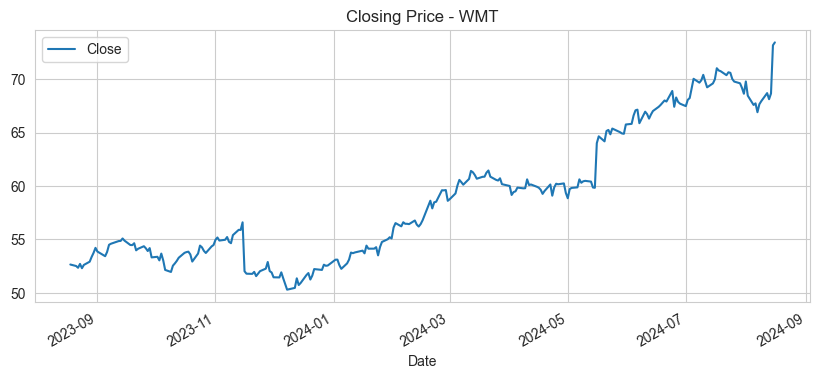

In [ ]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))


In [ ]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()


<Axes: xlabel='Daily Return', ylabel='Count'>

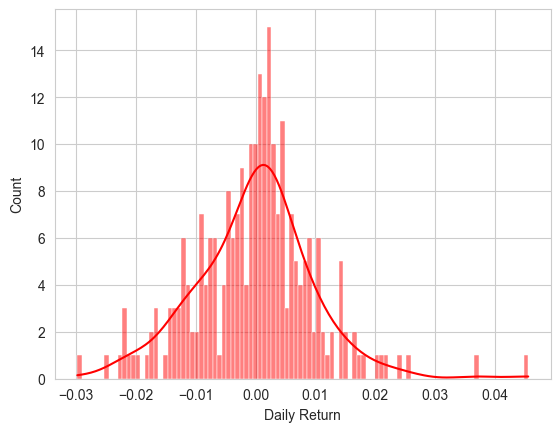

In [ ]:
JNJ['Daily Return'] = JNJ['Adj Close'].pct_change()

# Plot the distribution of daily returns
sns.histplot(JNJ['Daily Return'].dropna(),kde = True, bins=100, color='red')


In [ ]:
(JNJ['Daily Return'].dropna()).quantile(0.05)


-0.016803378335768244

In [ ]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()


<Axes: xlabel='Daily Return', ylabel='Count'>

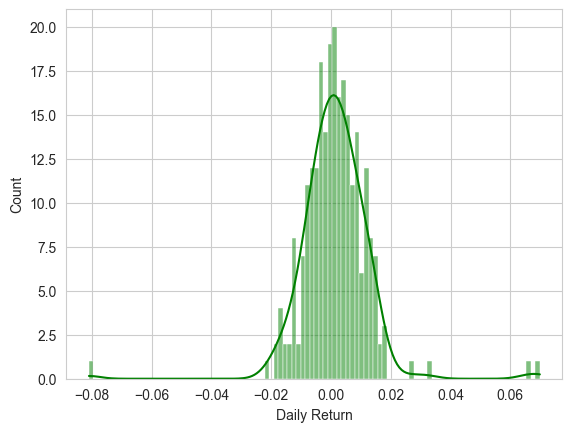

In [ ]:
# Calculate daily returns if not already done
WMT['Daily Return'] = WMT['Adj Close'].pct_change()

# Plot the distribution of daily returns
sns.histplot(WMT['Daily Return'].dropna(), kde = True,bins=100, color='green')


In [ ]:
(WMT['Daily Return'].dropna()).quantile(0.05)


-0.0126155297667844

In [ ]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()


<Axes: xlabel='Daily Return', ylabel='Count'>

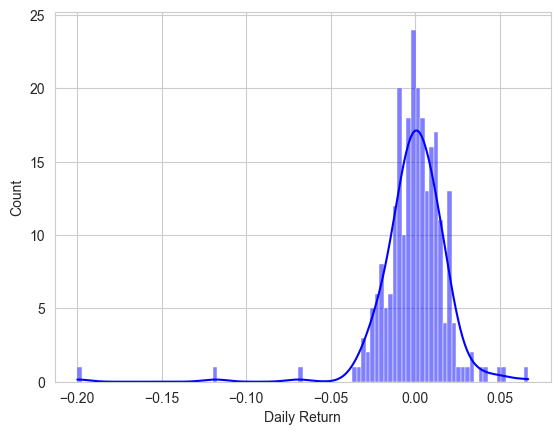

In [ ]:
# Calculate daily returns if not already done
NKE['Daily Return'] = NKE['Adj Close'].pct_change()

# Plot the distribution of daily returns
sns.histplot(NKE['Daily Return'].dropna(), kde=True, bins=100, color='blue')


In [ ]:
(NKE['Daily Return'].dropna()).quantile(0.05)


-0.025197364199485168